In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tensorflow


In [2]:
dataframe = pd.read_csv("Asteriods Dataset.csv")

C:\Users\Sagu0\AppData\Local\Temp\ipykernel_33972\67352339.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("Asteriods Dataset.csv")


In [3]:
dataframe.head(5)

id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.610000e-09  6.170000e-08  6.620000e-08  7.820000e-09   
1   545.000  ...  3.470000e-06  6.270000e-06  9.130000e-06  8.860000e-06   
2   246.596  ...  3.220000e-06  1.660000e-05  1.770000e-05  8.110000e-06   
3   525.400  ...  2.170000e-07  3.880000e-07  1.790000e-07  1.210000e-06   
4   106.699  ...  2.740000e-06  2.890000e-05  2.980000e-05  8.300000e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.110000e-11  1.200000e-12  3.780000e-08  9.420000e-09    MBA  0.43301  
1  4.960000e-09  4.650000e-10  4.080000e-05  3.680000e-06    MBA  0.35936  
2  4.360000e-09  4.410000e-10  3.530000e-05  3.110000e-06    MBA  0.33848  
3  1.650000e-09  2.610000e-10  4.100000e-06  1.270000e-06    MBA  0.39980  
4  4.730000e-09  5.520000e-10  3.470000e-05  3.490000e-06    MBA  0.52191  

[5 rows x 45 columns]

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  int64  
 16  equinox         958524 non-null  object 
 17  e         

In [5]:
dataframe.shape

(958524, 45)

In [6]:
dataframe.isna().sum(axis=0)

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [7]:
from sklearn.impute import KNNImputer

# Separate the data into known and missing diameter, creating copies to avoid SettingWithCopyWarning
known_data = dataframe[dataframe['diameter'].notna()].copy()
missing_data = dataframe[dataframe['diameter'].isna()].copy()

# Using KNN Imputer to impute missing values in known and missing data
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the 'known_data' DataFrame
known_data[['H', 'albedo', 'e']] = imputer.fit_transform(known_data[['H', 'albedo', 'e']])

# Impute missing values in the 'missing_data' DataFrame
missing_data[['H', 'albedo', 'e']] = imputer.transform(missing_data[['H', 'albedo', 'e']])

print(known_data)
print(missing_data)

              id     spkid            full_name        pdes     name prefix  \
0       a0000001   2000001              1 Ceres           1    Ceres    NaN   
1       a0000002   2000002             2 Pallas           2   Pallas    NaN   
2       a0000003   2000003               3 Juno           3     Juno    NaN   
3       a0000004   2000004              4 Vesta           4    Vesta    NaN   
4       a0000005   2000005            5 Astraea           5  Astraea    NaN   
...          ...       ...                  ...         ...      ...    ...   
891841  bK16N24W   3755298          (2016 NW24)   2016 NW24      NaN    NaN   
891971  bK16N35R   3755382          (2016 NR35)   2016 NR35      NaN    NaN   
894103  bK16P66B   3757444          (2016 PB66)   2016 PB66      NaN    NaN   
901055  bK16TB9F  54000016         (2016 TF119)  2016 TF119      NaN    NaN   
909489  bK17B98V   3768324          (2017 BV98)   2017 BV98      NaN    NaN   

       neo pha      H  diameter  ...       sigma_i 

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X_train = known_data[['H', 'albedo', 'e']]  # Features
y_train = known_data['diameter']            # Target (diameter)

# Train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error

# Evaluate model performance using Mean Squared Error (MSE)
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.43516034058234265


In [10]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)


In [11]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_poly = poly.fit_transform(X_train)


In [12]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
# gbm.fit(X_train, y_train)
# y_pred_gbm = gbm.predict(X_train)


In [13]:
# Define features for missing data
X_missing = missing_data[['H', 'albedo', 'e']]  # Features for prediction

# Predict the missing diameters
predicted_diameters = model.predict(X_missing)

# Assign the predicted diameters to the missing data
missing_data['diameter'] = predicted_diameters


In [14]:
# Combine known and missing data back together
final_diameter_data = pd.concat([known_data, missing_data], ignore_index=True)
print(final_diameter_data)

              id    spkid          full_name      pdes     name prefix neo  \
0       a0000001  2000001            1 Ceres         1    Ceres    NaN   N   
1       a0000002  2000002           2 Pallas         2   Pallas    NaN   N   
2       a0000003  2000003             3 Juno         3     Juno    NaN   N   
3       a0000004  2000004            4 Vesta         4    Vesta    NaN   N   
4       a0000005  2000005          5 Astraea         5  Astraea    NaN   N   
...          ...      ...                ...       ...      ...    ...  ..   
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L      NaN    NaN   N   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L      NaN    NaN   N   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L      NaN    NaN   Y   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2      NaN    NaN   N   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3      NaN    NaN   N   

       pha       H   diameter  ...       sigma_i      sigma_om 

In [15]:
# Check for any remaining missing values
print(final_diameter_data['diameter'].isna().sum())


0


In [16]:
from sklearn.metrics import mean_absolute_error

# Evaluate model performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.18536455498535345


In [17]:
dataframe.head()

id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.610000e-09  6.170000e-08  6.620000e-08  7.820000e-09   
1   545.000  ...  3.470000e-06  6.270000e-06  9.130000e-06  8.860000e-06   
2   246.596  ...  3.220000e-06  1.660000e-05  1.770000e-05  8.110000e-06   
3   525.400  ...  2.170000e-07  3.880000e-07  1.790000e-07  1.210000e-06   
4   106.699  ...  2.740000e-06  2.890000e-05  2.980000e-05  8.300000e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.110000e-11  1.200000e-12  3.780000e-08  9.420000e-09    MBA  0.43301  
1  4.960000e-09  4.650000e-10  4.080000e-05  3.680000e-06    MBA  0.35936  
2  4.360000e-09  4.410000e-10  3.530000e-05  3.110000e-06    MBA  0.33848  
3  1.650000e-09  2.610000e-10  4.100000e-06  1.270000e-06    MBA  0.39980  
4  4.730000e-09  5.520000e-10  3.470000e-05  3.490000e-06    MBA  0.52191  

[5 rows x 45 columns]

In [18]:
dataframe.shape

(958524, 45)

In [19]:
dataframe['name'].fillna('Unknown', inplace=True)
dataframe['is_name_missing'] = dataframe['name'].isna().astype(int)

In [20]:
dataframe['H'].fillna(dataframe['H'].median(), inplace=True)

In [21]:
dataframe.loc[final_diameter_data.index, 'diameter'] = final_diameter_data['diameter']


In [22]:
dataframe['albedo'].fillna(dataframe['albedo'].mean(), inplace=True)

In [23]:
dataframe['diameter_sigma'].fillna(dataframe['diameter_sigma'].median(),inplace=True)

In [24]:
dataframe['moid_ld'].fillna(dataframe['moid_ld'].mean(), inplace=True)
dataframe['sigma_e'].fillna(dataframe['sigma_e'].mean(), inplace=True)
dataframe['sigma_a'].fillna(dataframe['sigma_a'].mean(), inplace=True)

In [25]:
dataframe['moid'].fillna(dataframe['moid'].mean(), inplace=True)
dataframe['sigma_q'].fillna(dataframe['sigma_q'].mean(), inplace=True)
dataframe['sigma_i'].fillna(dataframe['sigma_i'].mean(), inplace=True)
dataframe['sigma_om'].fillna(dataframe['sigma_om'].mean(), inplace=True)
dataframe['sigma_w'].fillna(dataframe['sigma_w'].mean(), inplace=True)
dataframe['sigma_ma'].fillna(dataframe['sigma_ma'].mean(), inplace=True)
dataframe['sigma_ad'].fillna(dataframe['sigma_ad'].mean(), inplace=True)
dataframe['sigma_n'].fillna(dataframe['sigma_n'].mean(), inplace=True)
dataframe['sigma_tp'].fillna(dataframe['sigma_tp'].mean(), inplace=True)
dataframe['sigma_per'].fillna(dataframe['sigma_per'].mean(), inplace=True)



In [26]:
dataframe.isna().sum(axis=0)

id                      0
spkid                   0
full_name               0
pdes                    0
name                    0
prefix             958506
neo                     4
pha                 19921
H                       0
diameter                0
albedo                  0
diameter_sigma          0
orbit_id                0
epoch                   0
epoch_mjd               0
epoch_cal               0
equinox                 0
e                       0
a                       0
q                       0
i                       0
om                      0
w                       0
ma                      1
ad                      4
n                       0
tp                      0
tp_cal                  0
per                     4
per_y                   1
moid                    0
moid_ld                 0
sigma_e                 0
sigma_a                 0
sigma_q                 0
sigma_i                 0
sigma_om                0
sigma_w                 0
sigma_ma    

In [27]:
from sklearn.preprocessing import LabelEncoder

# # Handle missing values by filling with -1 (converted to string)
dataframe['neo'].fillna(-1, inplace=True)
dataframe['pha'].fillna(-1, inplace=True)

# Convert all values to string
dataframe['neo'] = dataframe['neo'].astype(str)
dataframe['pha'] = dataframe['pha'].astype(str)

# Apply LabelEncoder
le = LabelEncoder()
dataframe['neo'] = le.fit_transform(dataframe['neo'])
dataframe['pha'] = le.fit_transform(dataframe['pha'])

# Check the result
print(dataframe[['neo', 'pha']].head())


   neo  pha
0    1    1
1    1    1
2    1    1
3    1    1
4    1    1


In [28]:
print(dataframe[['neo', 'pha']].value_counts())
print(dataframe[dataframe['neo'] == 1].head())  # Check 'neo' for 1's
print(dataframe[dataframe['pha'] == 1].head())  # Check 'pha' for 1's


neo  pha
1    1      915705
2    1       20828
1    0       19920
2    2        2066
0    1           4
2    0           1
dtype: int64
         id    spkid       full_name pdes     name prefix  neo  pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN    1    1  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN    1    1  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN    1    1  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN    1    1  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN    1    1  6.90   

   diameter  ...      sigma_om       sigma_w      sigma_ma      sigma_ad  \
0   939.400  ...  6.170000e-08  6.620000e-08  7.820000e-09  1.110000e-11   
1   545.000  ...  6.270000e-06  9.130000e-06  8.860000e-06  4.960000e-09   
2   246.596  ...  1.660000e-05  1.770000e-05  8.110000e-06  4.360000e-09   
3   525.400  ...  3.880000e-07  1.790000e-07  1.210000e-06  1.650000e-09   
4   106.699  ...  2.8

In [29]:
import pandas as pd
import numpy as np

# Assuming you have already loaded your DataFrame
# dataframe = pd.read_csv("Asteriods Dataset.csv", low_memory=False)

# Preprocessing function
def preproc(dat):
    dat.dropna(axis=0, how='all', inplace=True)
    dat.replace(['\n'], [""], regex=True, inplace=True)
    dat.columns = dat.columns.str.replace('\n', "")
    return dat

# Apply preprocessing
dataframe = preproc(dataframe)

# Check if 'prefix' exists before dropping it
if 'prefix' in dataframe.columns:
    dataframe.drop(['prefix'], axis=1, inplace=True)
else:
    print("'prefix' column not found in the DataFrame.")

In [30]:
dataframe.isna().sum(axis=0)

id                 0
spkid              0
full_name          0
pdes               0
name               0
neo                0
pha                0
H                  0
diameter           0
albedo             0
diameter_sigma     0
orbit_id           0
epoch              0
epoch_mjd          0
epoch_cal          0
equinox            0
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 1
ad                 4
n                  0
tp                 0
tp_cal             0
per                4
per_y              1
moid               0
moid_ld            0
sigma_e            0
sigma_a            0
sigma_q            0
sigma_i            0
sigma_om           0
sigma_w            0
sigma_ma           0
sigma_ad           0
sigma_n            0
sigma_tp           0
sigma_per          0
class              0
rms                2
is_name_missing    0
dtype: int64

In [31]:
dataframe.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms', 'is_name_missing'],
      dtype='object')

In [32]:
print(dataframe)  # This will print the dataframe or None

dataframe.drop(['pdes', 'equinox'], axis=1, inplace=True)


              id    spkid          full_name      pdes     name  neo  pha  \
0       a0000001  2000001            1 Ceres         1    Ceres    1    1   
1       a0000002  2000002           2 Pallas         2   Pallas    1    1   
2       a0000003  2000003             3 Juno         3     Juno    1    1   
3       a0000004  2000004            4 Vesta         4    Vesta    1    1   
4       a0000005  2000005          5 Astraea         5  Astraea    1    1   
...          ...      ...                ...       ...      ...  ...  ...   
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L  Unknown    1    1   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L  Unknown    1    1   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L  Unknown    2    2   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2  Unknown    1    1   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3  Unknown    1    1   

             H   diameter    albedo  ...      sigma_om       sigma_w  \
0  

In [33]:
dataframe.shape

(958524, 43)

In [34]:
if dataframe is not None:
    duplicates = dataframe[dataframe.duplicated()]
    print(duplicates)
else:
    print("dataframe is None. Please check if it has been correctly assigned.")


Empty DataFrame
Columns: [id, spkid, full_name, name, neo, pha, H, diameter, albedo, diameter_sigma, orbit_id, epoch, epoch_mjd, epoch_cal, e, a, q, i, om, w, ma, ad, n, tp, tp_cal, per, per_y, moid, moid_ld, sigma_e, sigma_a, sigma_q, sigma_i, sigma_om, sigma_w, sigma_ma, sigma_ad, sigma_n, sigma_tp, sigma_per, class, rms, is_name_missing]
Index: []

[0 rows x 43 columns]


In [35]:
# dataframe[dataframe.duplicate()]
# Identify duplicate rows
dataframe[dataframe.duplicated()]

# Display duplicate rows
print(duplicates)


Empty DataFrame
Columns: [id, spkid, full_name, name, neo, pha, H, diameter, albedo, diameter_sigma, orbit_id, epoch, epoch_mjd, epoch_cal, e, a, q, i, om, w, ma, ad, n, tp, tp_cal, per, per_y, moid, moid_ld, sigma_e, sigma_a, sigma_q, sigma_i, sigma_om, sigma_w, sigma_ma, sigma_ad, sigma_n, sigma_tp, sigma_per, class, rms, is_name_missing]
Index: []

[0 rows x 43 columns]


<AxesSubplot:>

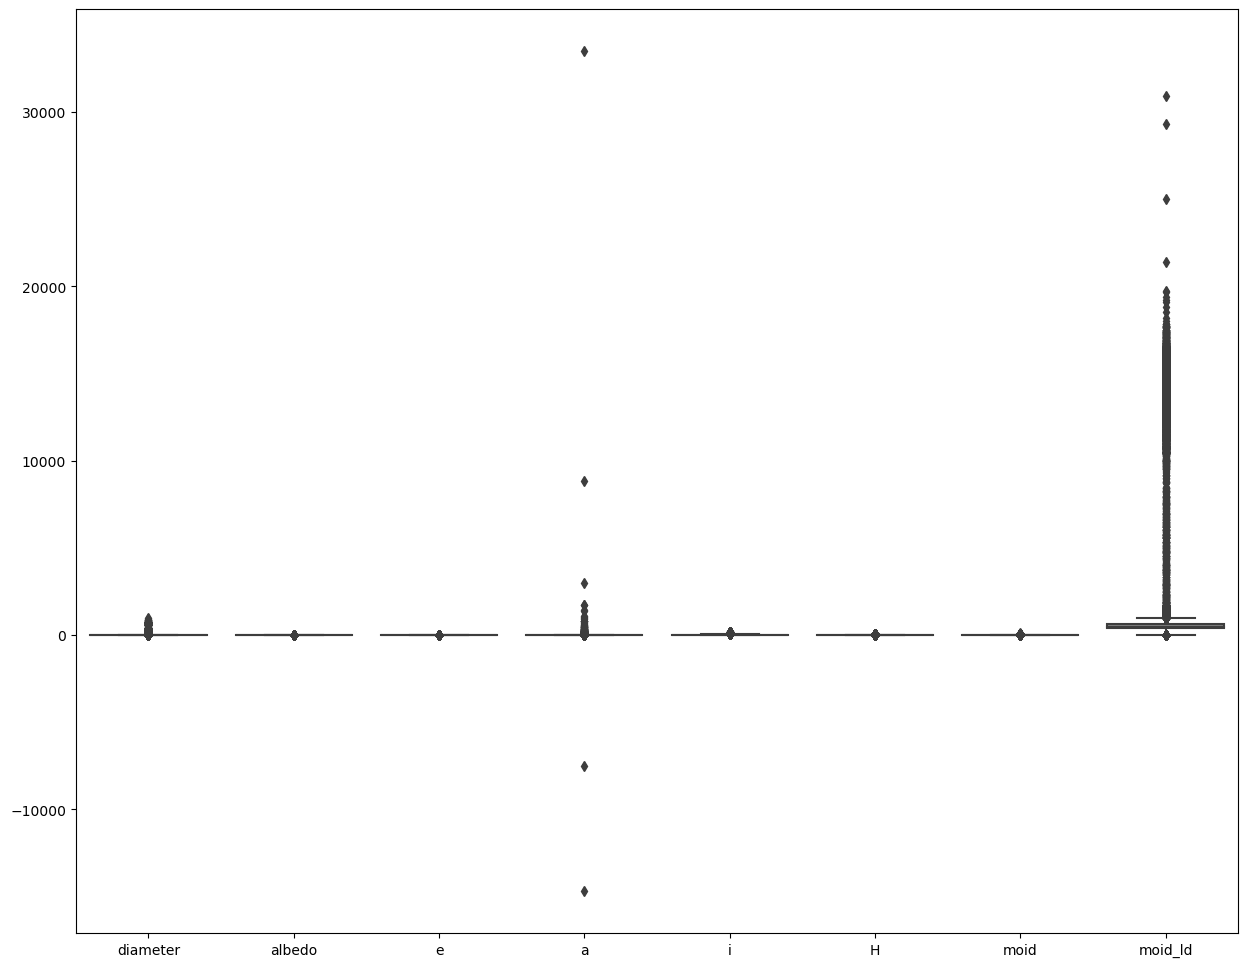

In [36]:
# Checking Outliers
plt.figure(figsize=(15,12))
sns.boxplot(data=dataframe[['diameter','albedo','e','a','i','H','moid','moid_ld']])

In [37]:
# Handle outliers
def handle_outliers(series):
    if series is None:
        print("Received None as input.")
        return series
    
    # Convert to numeric, coerce errors to NaN
    series = pd.to_numeric(series, errors='coerce')
    
    # Compute percentiles, ignoring NaN
    tenth_percent = series.quantile(0.10)
    ninetieth_percent = series.quantile(0.90)
    
    print(f"10th Percentile for {series.name}: {tenth_percent}")
    print(f"90th Percentile for {series.name}: {ninetieth_percent}")
    
    # Clip the series to the percentiles
    series_clipped = series.clip(lower=tenth_percent, upper=ninetieth_percent)
    
    return series_clipped

# List of columns to process
columns_to_process = ['diameter','albedo','e','a','i','H','moid','moid_ld']

# Ensure all columns are present and numeric
for col in columns_to_process:
    if col not in dataframe.columns:
        print(f"Warning: Column '{col}' not found in DataFrame.")
        continue
    dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
    # Optionally, verify there are no NaNs after filling
    # If there are, decide whether to fill or drop
    if dataframe[col].isna().sum() > 0:
        print(f"Column '{col}' still has {dataframe[col].isna().sum()} missing values.")
        dataframe[col].fillna(dataframe[col].median(), inplace=True)  # Example: filling with median


<!--  -->Feature engineering for rare events, like particularly large or near-Earth asteroids,

In [38]:
# Large Asteroid Flag: Create a binary flag for asteroids with a diameter above a certain threshold
diameter_threshold = dataframe['diameter'].quantile(0.90)  # Threshold can be set at the 95th percentile
dataframe['large_asteroid_flag'] = (dataframe['diameter'] > diameter_threshold).astype(int)
print(diameter_threshold)

4.403770000000004


In [39]:
# Near-Earth Object (NEO) Flag:
dataframe['is_neo'] = (dataframe['moid'] < 0.05).astype(int)  # Example threshold for proximity to Earth

In [40]:
# High Albedo Flag
albedo_threshold = dataframe['albedo'].quantile(0.95)
dataframe['high_albedo_flag'] = (dataframe['albedo'] > albedo_threshold).astype(int)


In [41]:
#  Distance Metrics:
# Distance from Earth: 
dataframe['proximity_to_earth'] = dataframe['moid']  # or use 'moid_ld' for lunar distances


In [42]:
# Log-transformed Features:
dataframe['log_diameter'] = np.log1p(dataframe['diameter'])
dataframe['log_moid'] = np.log1p(dataframe['moid'])
dataframe['log_moid_ld'] = np.log1p(dataframe['moid_ld'])


In [43]:
# Diameter-Albedo Interaction:
dataframe['diameter_albedo_interaction'] = dataframe['diameter'] * dataframe['albedo']
print(dataframe['diameter_albedo_interaction'])

0          84.546000
1          55.045000
2          52.771544
3         222.139120
4          29.235526
             ...    
958519      0.309070
958520      0.162614
958521      0.038837
958522      0.207627
958523      0.213045
Name: diameter_albedo_interaction, Length: 958524, dtype: float64


In [44]:
# Eccentricity-Inclination Interaction: 
dataframe['eccentricity_inclination_interaction'] = dataframe['e'] * dataframe['i']
print(dataframe['eccentricity_inclination_interaction'])

0         0.805245
1         8.010608
2         3.337872
3         0.633628
4         1.024713
            ...   
958519    1.112615
958520    2.286635
958521    3.099769
958522    0.148000
958523    2.496147
Name: eccentricity_inclination_interaction, Length: 958524, dtype: float64


In [45]:
# Categorical Features:
# Risk Level Classification:
conditions = [
    (dataframe['diameter'] > diameter_threshold) & (dataframe['moid'] < 0.05),
    (dataframe['diameter'] > diameter_threshold) & (dataframe['moid'] >= 0.05),
    (dataframe['diameter'] <= diameter_threshold)
]
choices = ['High Risk', 'Medium Risk', 'Low Risk']
dataframe['risk_level'] = np.select(conditions, choices, default='Low Risk')
print(choices)
print(dataframe['risk_level'])
risk_count = dataframe['risk_level'].value_counts()
print(risk_count)

['High Risk', 'Medium Risk', 'Low Risk']
0         Medium Risk
1         Medium Risk
2         Medium Risk
3         Medium Risk
4         Medium Risk
             ...     
958519       Low Risk
958520       Low Risk
958521       Low Risk
958522       Low Risk
958523       Low Risk
Name: risk_level, Length: 958524, dtype: object
Low Risk       862672
Medium Risk     95590
High Risk         262
Name: risk_level, dtype: int64


In [46]:
# Temporal Features:
# Time to Close Approach:
dataframe['time_to_close_approach'] = (pd.to_datetime(dataframe['tp_cal']) - pd.to_datetime('today')).dt.days


In [47]:
random_sample = dataframe.sample(n=5, random_state=42)  
print(random_sample)

              id    spkid           full_name     name  neo  pha     H  \
323650  a0323651  2323651  323651 (2005 BR20)  Unknown    1    1  18.2   
571724  bK04C47Q  3242421         (2004 CQ47)  Unknown    1    1  17.7   
395983  a0395984  2395984  395984 (2013 BV32)  Unknown    1    1  17.4   
235862  a0235863  2235863  235863 (2005 AY53)  Unknown    1    1  15.1   
651830  bK09B35Q  3445579         (2009 BQ35)  Unknown    1    1  17.3   

        diameter    albedo  diameter_sigma  ... is_neo  high_albedo_flag  \
323650   3.20939  0.130627           0.332  ...      0                 0   
571724   2.58152  0.130627           0.332  ...      0                 0   
395983   2.93169  0.130627           0.332  ...      0                 0   
235862   3.20272  0.045000           0.282  ...      0                 0   
651830   1.26144  0.130627           0.332  ...      0                 0   

        proximity_to_earth  log_diameter  log_moid  log_moid_ld  \
323650            0.968024     

In [48]:
dataframe.head()

id    spkid       full_name     name  neo  pha     H  diameter  \
0  a0000001  2000001         1 Ceres    Ceres    1    1  3.40   939.400   
1  a0000002  2000002        2 Pallas   Pallas    1    1  4.20   545.000   
2  a0000003  2000003          3 Juno     Juno    1    1  5.33   246.596   
3  a0000004  2000004         4 Vesta    Vesta    1    1  3.00   525.400   
4  a0000005  2000005       5 Astraea  Astraea    1    1  6.90   106.699   

   albedo  diameter_sigma  ... is_neo  high_albedo_flag  proximity_to_earth  \
0  0.0900           0.200  ...      0                 0             1.59478   
1  0.1010          18.000  ...      0                 0             1.23429   
2  0.2140          10.594  ...      0                 1             1.03429   
3  0.4228           0.200  ...      0                 1             1.13948   
4  0.2740           3.140  ...      0                 1             1.09575   

   log_diameter  log_moid  log_moid_ld  diameter_albedo_interaction  \
0      6.846305  0.953502     6.432362                    84.546000   
1      6.302619  0.803924     6.176592                    55.045000   
2      5.511798  0.710147     6.000213                    52.771544   
3      6.266061  0.760563     6.096841                   222.139120   
4      4.679340  0.739911     6.057798                    29.235526   

   eccentricity_inclination_interaction   risk_level  time_to_close_approach  
0                              0.805245  Medium Risk                  -20034  
1                              8.010608  Medium Risk                  -20034  
2                              3.337872  Medium Risk                  -20034  
3                              0.633628  Medium Risk                  -20034  
4                              1.024713  Medium Risk                  -20034  

[5 rows x 54 columns]

In [49]:
dataframe.to_csv('Asteriods Uadated Dataset.csv', index=False)


In [50]:
dataframe.head()

id    spkid       full_name     name  neo  pha     H  diameter  \
0  a0000001  2000001         1 Ceres    Ceres    1    1  3.40   939.400   
1  a0000002  2000002        2 Pallas   Pallas    1    1  4.20   545.000   
2  a0000003  2000003          3 Juno     Juno    1    1  5.33   246.596   
3  a0000004  2000004         4 Vesta    Vesta    1    1  3.00   525.400   
4  a0000005  2000005       5 Astraea  Astraea    1    1  6.90   106.699   

   albedo  diameter_sigma  ... is_neo  high_albedo_flag  proximity_to_earth  \
0  0.0900           0.200  ...      0                 0             1.59478   
1  0.1010          18.000  ...      0                 0             1.23429   
2  0.2140          10.594  ...      0                 1             1.03429   
3  0.4228           0.200  ...      0                 1             1.13948   
4  0.2740           3.140  ...      0                 1             1.09575   

   log_diameter  log_moid  log_moid_ld  diameter_albedo_interaction  \
0      6.846305  0.953502     6.432362                    84.546000   
1      6.302619  0.803924     6.176592                    55.045000   
2      5.511798  0.710147     6.000213                    52.771544   
3      6.266061  0.760563     6.096841                   222.139120   
4      4.679340  0.739911     6.057798                    29.235526   

   eccentricity_inclination_interaction   risk_level  time_to_close_approach  
0                              0.805245  Medium Risk                  -20034  
1                              8.010608  Medium Risk                  -20034  
2                              3.337872  Medium Risk                  -20034  
3                              0.633628  Medium Risk                  -20034  
4                              1.024713  Medium Risk                  -20034  

[5 rows x 54 columns]

In [51]:
from sklearn.preprocessing import StandardScaler

# Print the actual column names to find the correct ones
print(dataframe.columns)

# Adjust the column names in your code based on the actual names
scaler = StandardScaler()
dataframe[['diameter', 'albedo', 'e', 'a', 'q', 'i', 'ma', 'tp', 'diameter_sigma', 'om', 'w', 'moid', 'diameter_albedo_interaction']] = scaler.fit_transform(
    dataframe[['diameter', 'albedo', 'e', 'a', 'q', 'i', 'ma', 'tp', 'diameter_sigma', 'om', 'w', 'moid', 'diameter_albedo_interaction']])


Index(['id', 'spkid', 'full_name', 'name', 'neo', 'pha', 'H', 'diameter',
       'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd',
       'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a',
       'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad',
       'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms', 'is_name_missing',
       'large_asteroid_flag', 'is_neo', 'high_albedo_flag',
       'proximity_to_earth', 'log_diameter', 'log_moid', 'log_moid_ld',
       'diameter_albedo_interaction', 'eccentricity_inclination_interaction',
       'risk_level', 'time_to_close_approach'],
      dtype='object')


In [52]:
dataframe.head()

id    spkid       full_name     name  neo  pha     H   diameter  \
0  a0000001  2000001         1 Ceres    Ceres    1    1  3.40  67.546358   
1  a0000002  2000002        2 Pallas   Pallas    1    1  4.20  39.080634   
2  a0000003  2000003          3 Juno     Juno    1    1  5.33  17.543398   
3  a0000004  2000004         4 Vesta    Vesta    1    1  3.00  37.666008   
4  a0000005  2000005       5 Astraea  Astraea    1    1  6.90   7.446366   

     albedo  diameter_sigma  ... is_neo  high_albedo_flag  proximity_to_earth  \
0 -0.980894       -0.510633  ...      0                 0             1.59478   
1 -0.715312       58.936827  ...      0                 0             1.23429   
2  2.012936       34.202676  ...      0                 1             1.03429   
3  7.054159       -0.510633  ...      0                 1             1.13948   
4  3.461563        9.308217  ...      0                 1             1.09575   

   log_diameter  log_moid  log_moid_ld  diameter_albedo_interaction  \
0      6.846305  0.953502     6.432362                    45.690009   
1      6.302619  0.803924     6.176592                    29.658067   
2      5.511798  0.710147     6.000213                    28.422586   
3      6.266061  0.760563     6.096841                   120.463238   
4      4.679340  0.739911     6.057798                    15.632237   

   eccentricity_inclination_interaction   risk_level  time_to_close_approach  
0                              0.805245  Medium Risk                  -20034  
1                              8.010608  Medium Risk                  -20034  
2                              3.337872  Medium Risk                  -20034  
3                              0.633628  Medium Risk                  -20034  
4                              1.024713  Medium Risk                  -20034  

[5 rows x 54 columns]

<AxesSubplot:>

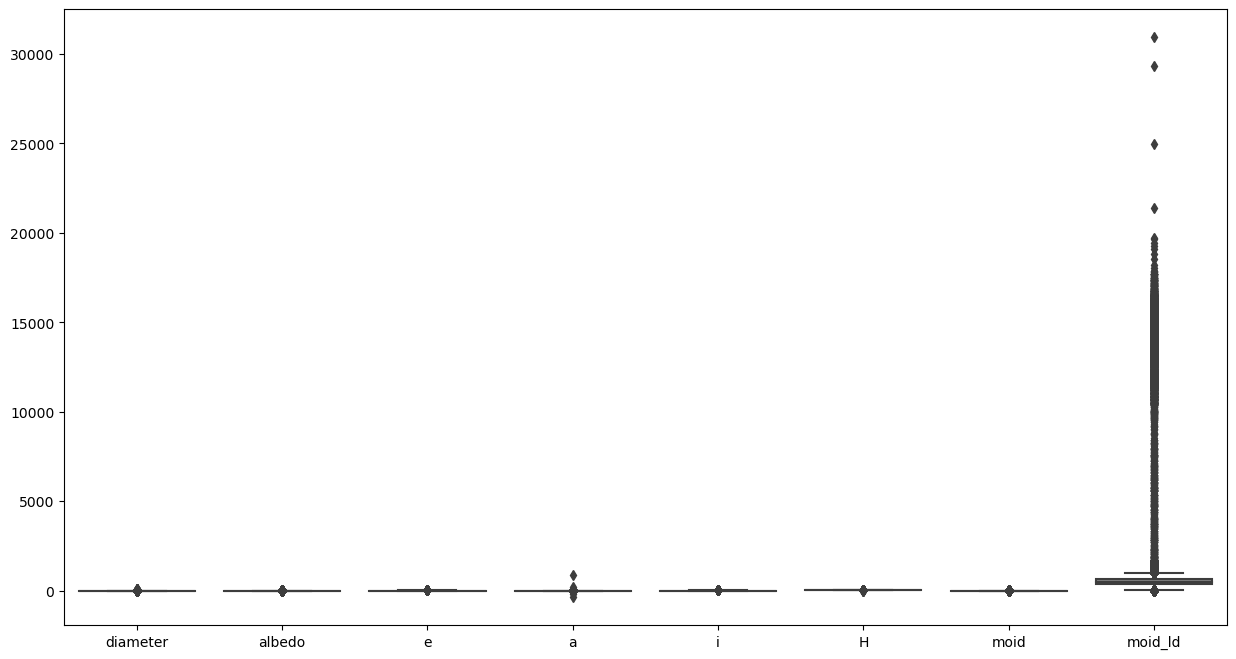

In [53]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dataframe[['diameter','albedo','e','a','i','H','moid','moid_ld']])

In [54]:

# Handle outliers
def handle_outliers(series):
    if series is None:
        print("Received None as input.")
        return series
    
    # Convert to numeric, coerce errors to NaN
    series = pd.to_numeric(series, errors='coerce')
    
    # Compute percentiles, ignoring NaN
    tenth_percent = series.quantile(0.10)
    ninetieth_percent = series.quantile(0.90)
    
    print(f"10th Percentile for {series.name}: {tenth_percent}")
    print(f"90th Percentile for {series.name}: {ninetieth_percent}")
    
    # Clip the series to the percentiles
    series_clipped = series.clip(lower=tenth_percent, upper=ninetieth_percent)
    
    return series_clipped

# List of columns to process
columns_to_process = ['diameter','albedo','e','a','i','H','moid','moid_ld']

# Ensure all columns are present and numeric
for col in columns_to_process:
    if col not in dataframe.columns:
        print(f"Warning: Column '{col}' not found in DataFrame.")
        continue
    dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
    # Optionally, verify there are no NaNs after filling
    # If there are, decide whether to fill or drop
    if dataframe[col].isna().sum() > 0:
        print(f"Column '{col}' still has {dataframe[col].isna().sum()} missing values.")
        dataframe[col].fillna(dataframe[col].median(), inplace=True)  # Example: filling with median

# Apply outlier handling
for col in columns_to_process:
    if col not in dataframe.columns:
        continue
    print(f"Processing column: {col}")
    dataframe[col] = handle_outliers(dataframe[col])
    print(dataframe[col].head(), "\n")

# Optionally, print summary after outlier handling
for col in columns_to_process:
    if col not in dataframe.columns:
        continue
    Q10 = dataframe[col].quantile(0.10)
    Q90 = dataframe[col].quantile(0.90)
    print(f"{col} - 10th Percentile: {Q10}, 90th Percentile: {Q90}")
    lower_outliers = (dataframe[col] < Q10).sum()
    upper_outliers = (dataframe[col] > Q90).sum()
    print(f"Number of values below 10th percentile: {lower_outliers}")
    print(f"Number of values above 90th percentile: {upper_outliers}\n")


Processing column: diameter
10th Percentile for diameter: -0.16154928729702286
90th Percentile for diameter: 0.06323228002298097
0    0.063232
1    0.063232
2    0.063232
3    0.063232
4    0.063232
Name: diameter, dtype: float64 

Processing column: albedo
10th Percentile for albedo: 1.139212079769609e-14
90th Percentile for albedo: 1.139212079769609e-14
0    1.139212e-14
1    1.139212e-14
2    1.139212e-14
3    1.139212e-14
4    1.139212e-14
Name: albedo, dtype: float64 

Processing column: e
10th Percentile for e: -1.0759278795611564
90th Percentile for e: 1.0802119989095982
0   -0.864692
1    0.797214
2    1.080212
3   -0.727472
4    0.375605
Name: e, dtype: float64 

Processing column: a
10th Percentile for a: -0.016328831547636757
90th Percentile for a: 0.006142917353436647
0   -0.003348
1   -0.003230
2   -0.005888
3   -0.013614
4   -0.008261
Name: a, dtype: float64 

Processing column: i
10th Percentile for i: -1.0113010176755939
90th Percentile for i: 1.2480118623219016
0    0.

<AxesSubplot:>

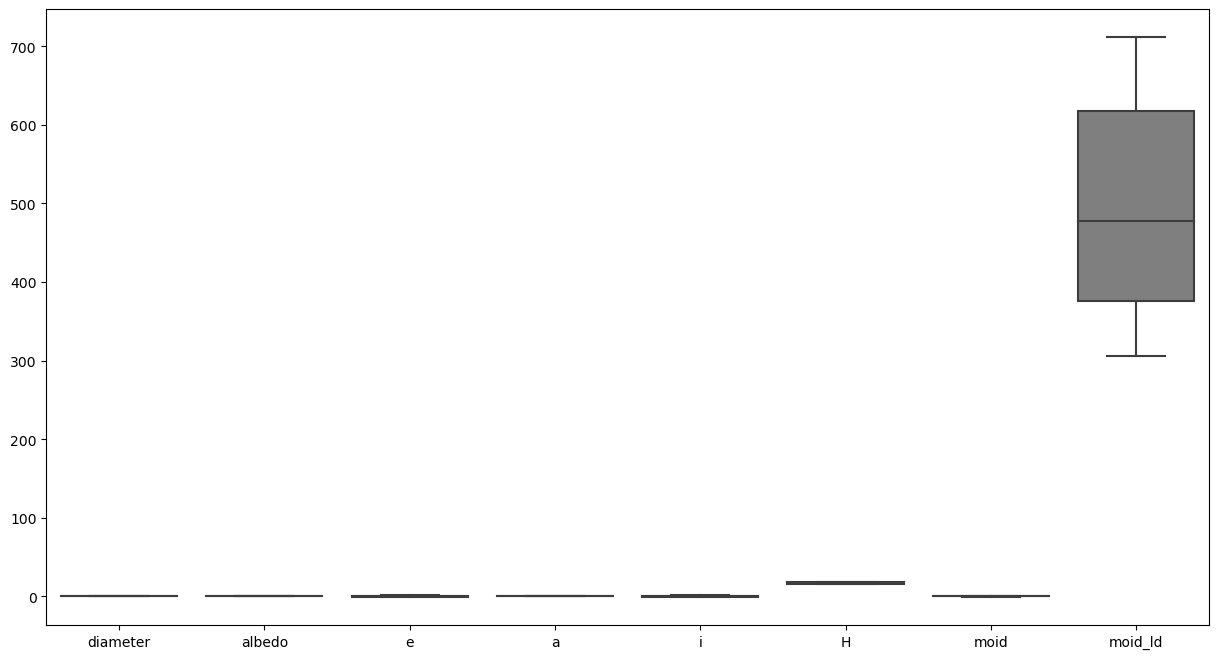

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dataframe[['diameter','albedo','e','a','i','H','moid','moid_ld']])

In [56]:
dataframe.head()

id    spkid       full_name     name  neo  pha     H  diameter  \
0  a0000001  2000001         1 Ceres    Ceres    1    1  15.1  0.063232   
1  a0000002  2000002        2 Pallas   Pallas    1    1  15.1  0.063232   
2  a0000003  2000003          3 Juno     Juno    1    1  15.1  0.063232   
3  a0000004  2000004         4 Vesta    Vesta    1    1  15.1  0.063232   
4  a0000005  2000005       5 Astraea  Astraea    1    1  15.1  0.063232   

         albedo  diameter_sigma  ... is_neo  high_albedo_flag  \
0  1.139212e-14       -0.510633  ...      0                 0   
1  1.139212e-14       58.936827  ...      0                 0   
2  1.139212e-14       34.202676  ...      0                 1   
3  1.139212e-14       -0.510633  ...      0                 1   
4  1.139212e-14        9.308217  ...      0                 1   

   proximity_to_earth  log_diameter  log_moid  log_moid_ld  \
0             1.59478      6.846305  0.953502     6.432362   
1             1.23429      6.302619  0.803924     6.176592   
2             1.03429      5.511798  0.710147     6.000213   
3             1.13948      6.266061  0.760563     6.096841   
4             1.09575      4.679340  0.739911     6.057798   

   diameter_albedo_interaction  eccentricity_inclination_interaction  \
0                    45.690009                              0.805245   
1                    29.658067                              8.010608   
2                    28.422586                              3.337872   
3                   120.463238                              0.633628   
4                    15.632237                              1.024713   

    risk_level  time_to_close_approach  
0  Medium Risk                  -20034  
1  Medium Risk                  -20034  
2  Medium Risk                  -20034  
3  Medium Risk                  -20034  
4  Medium Risk                  -20034  

[5 rows x 54 columns]

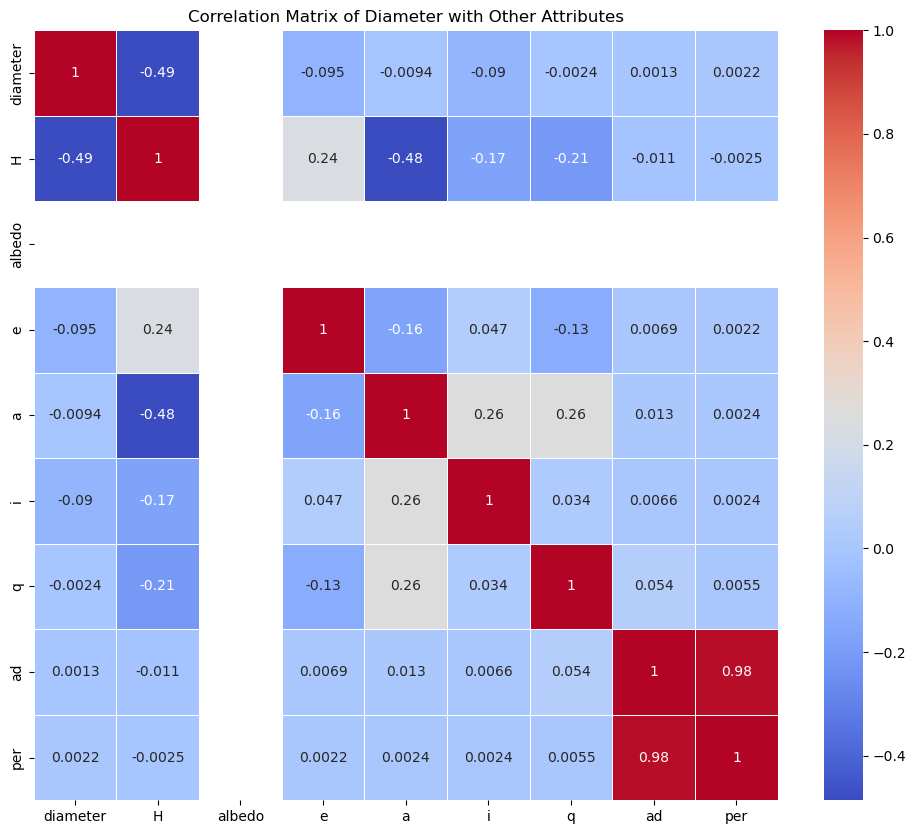

<Figure size 640x480 with 0 Axes>

In [57]:
# Select potential attributes related to diameter
correlation_features = ['diameter', 'H', 'albedo', 'e', 'a', 'i', 'q', 'ad', 'per']  # Add or remove features as needed

# Drop rows with missing values in these columns
df_clean = dataframe[correlation_features].dropna()

# Compute correlation matrix
correlation_matrix = df_clean.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12 ,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diameter with Other Attributes')
plt.show()
plt.savefig("Correlation Matrix of Diameter with Other Attributes")

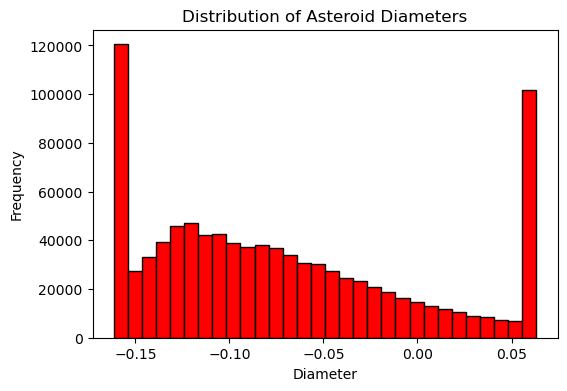

In [58]:
# Plot a histogram for the 'diameter' attribute
plt.figure(figsize=(6, 4))
plt.hist(dataframe['diameter'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Asteroid Diameters')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()


In [59]:
(dataframe['diameter'].describe())

count    958524.000000
mean         -0.071744
std           0.070266
min          -0.161549
25%          -0.128329
50%          -0.085658
75%          -0.026645
max           0.063232
Name: diameter, dtype: float64

In [60]:
dataframe['diameter'].unique()

array([ 0.06323228, -0.07207879,  0.04852523, ..., -0.06437846,
       -0.08383967, -0.13689605])

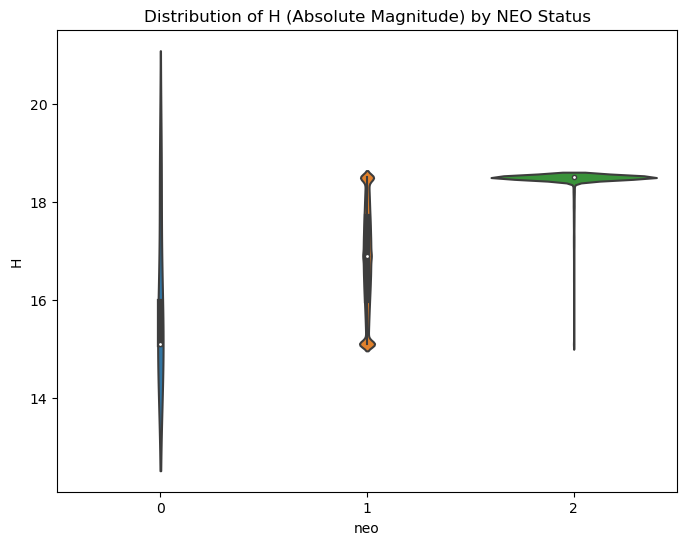

In [61]:
# Violin plot for 'H' (Absolute Magnitude) by 'neo'
plt.figure(figsize=(8, 6))
sns.violinplot(x='neo', y='H', data=dataframe)
plt.title('Distribution of H (Absolute Magnitude) by NEO Status')
plt.show()


<Figure size 1200x1200 with 0 Axes>

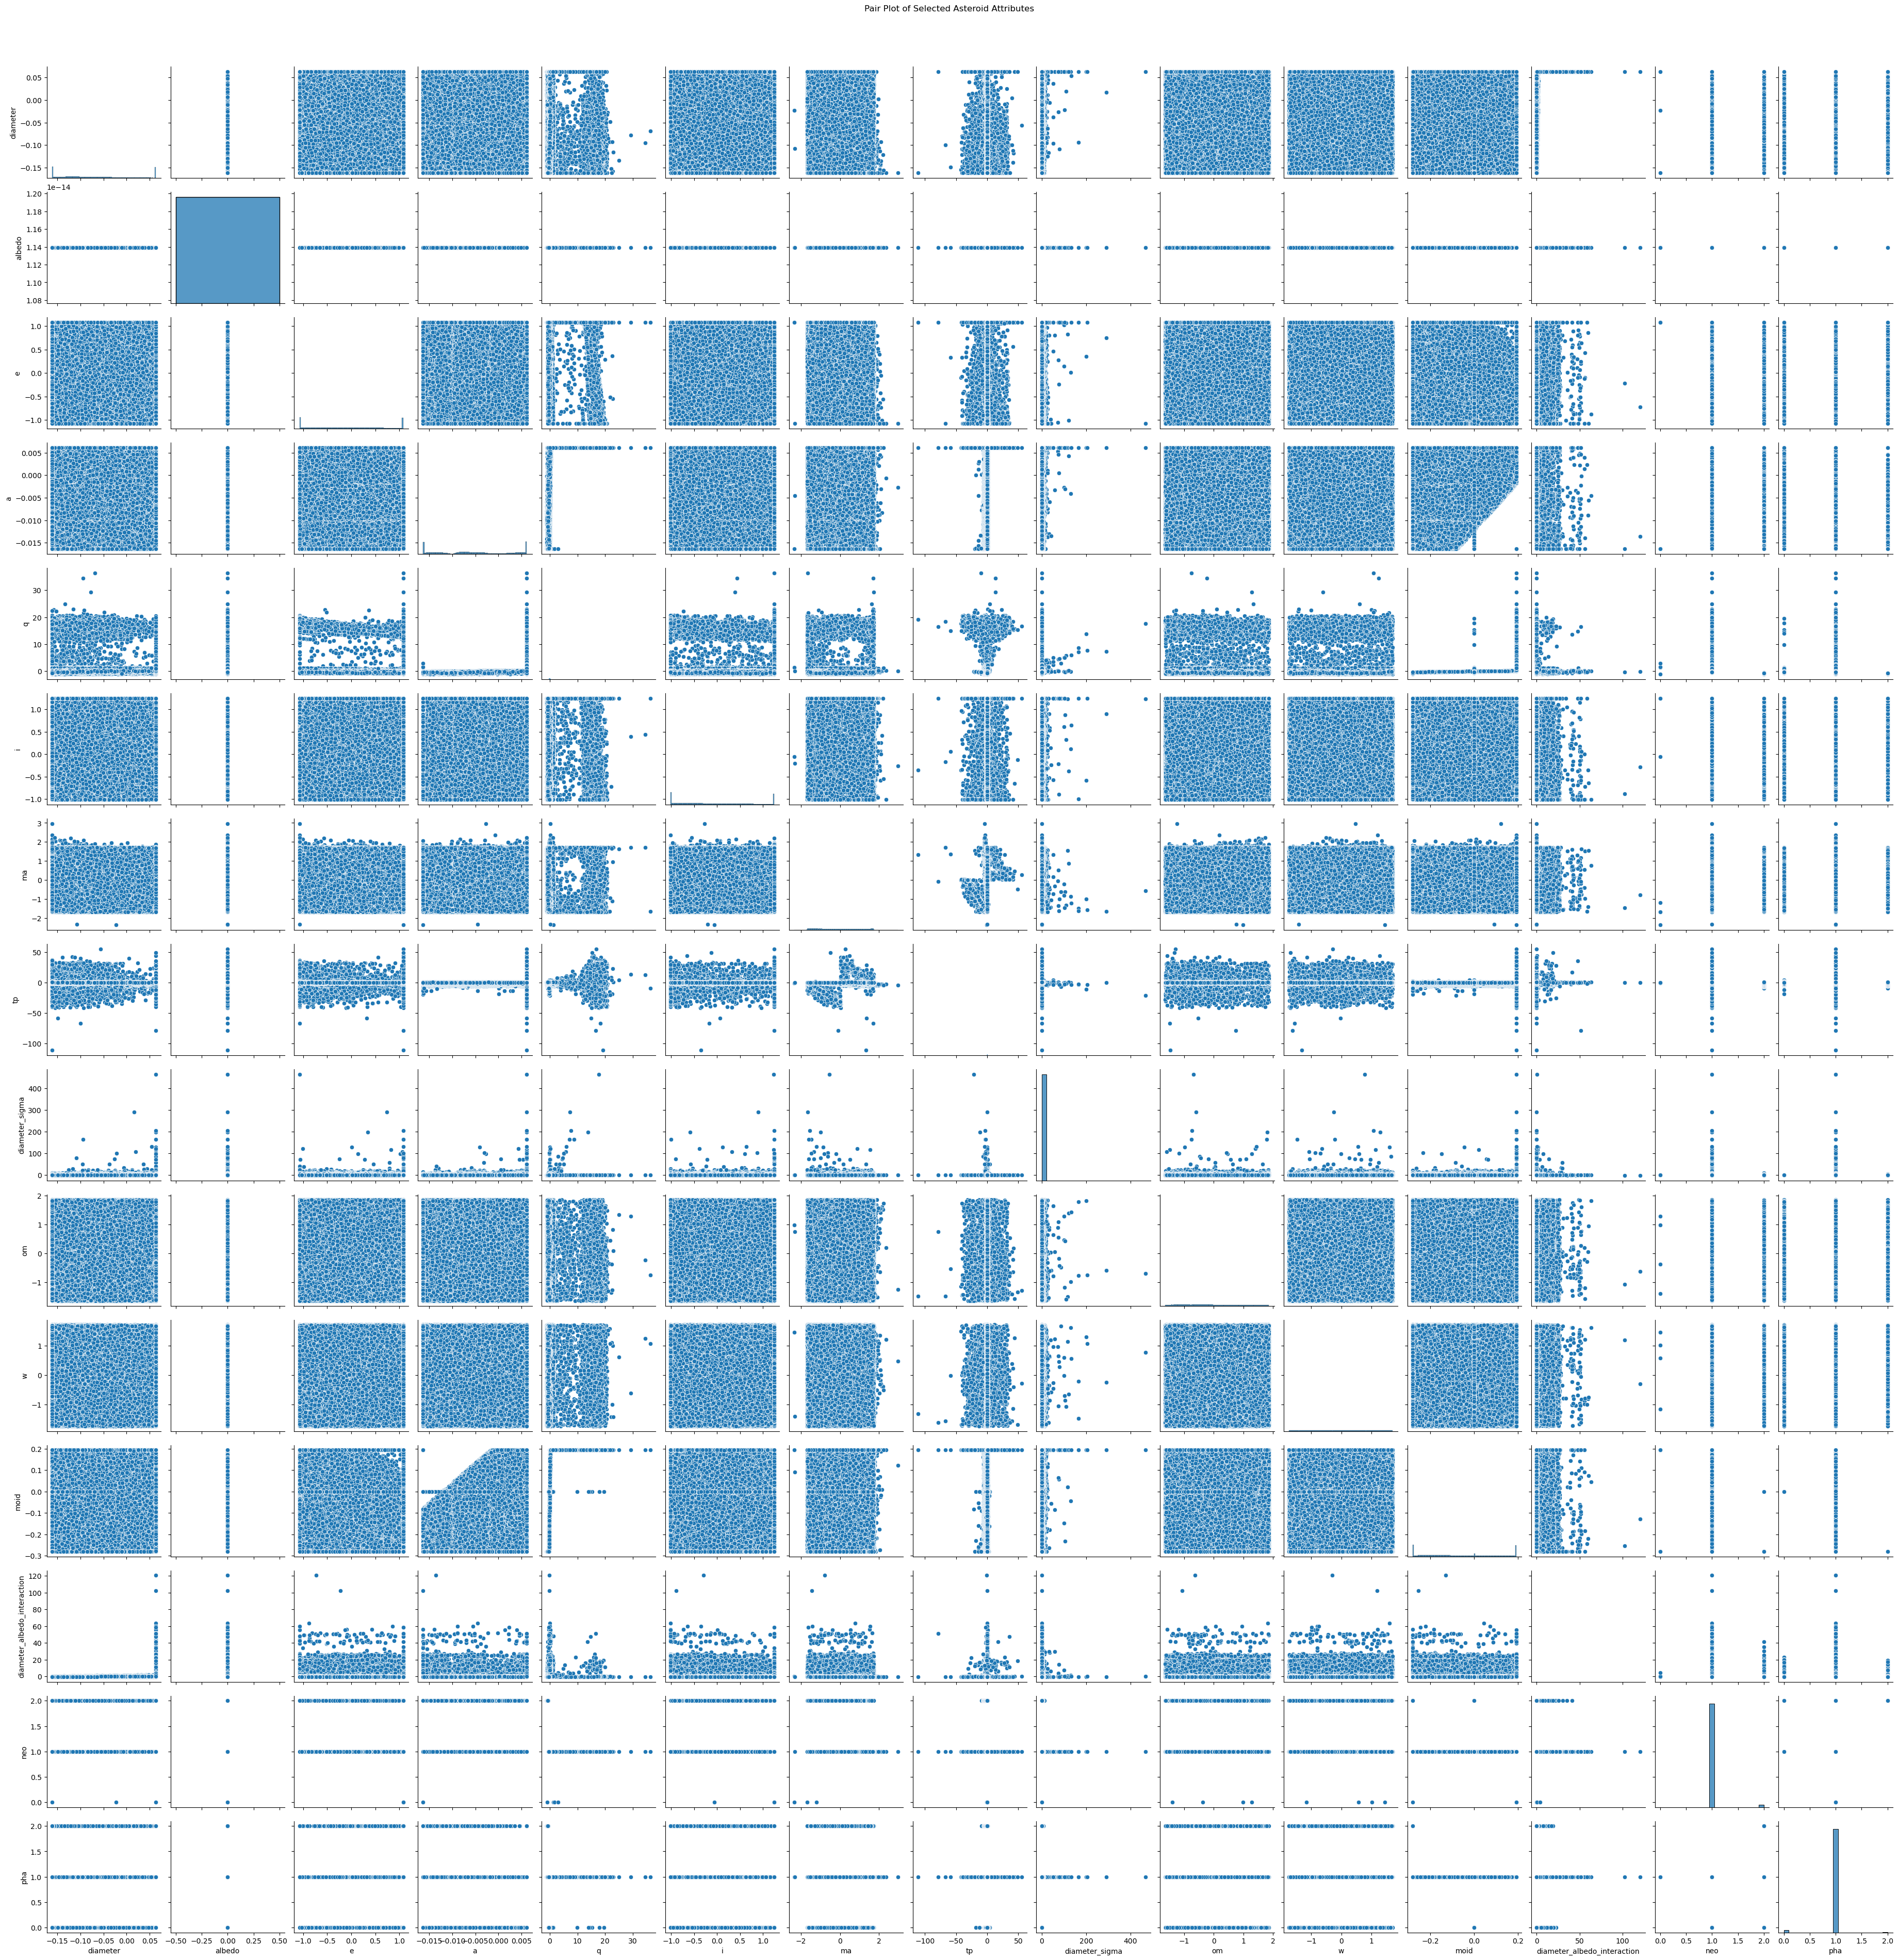

In [62]:
# Pair plot for selected attributes
plt.figure(figsize=(12,12))
sns.pairplot(dataframe[['diameter', 'albedo', 'e', 'a', 'q', 'i', 'ma', 'tp', 'diameter_sigma', 'om', 'w', 'moid', 'diameter_albedo_interaction','neo', 'pha']])
plt.suptitle('Pair Plot of Selected Asteroid Attributes', y=1.02)
plt.show()


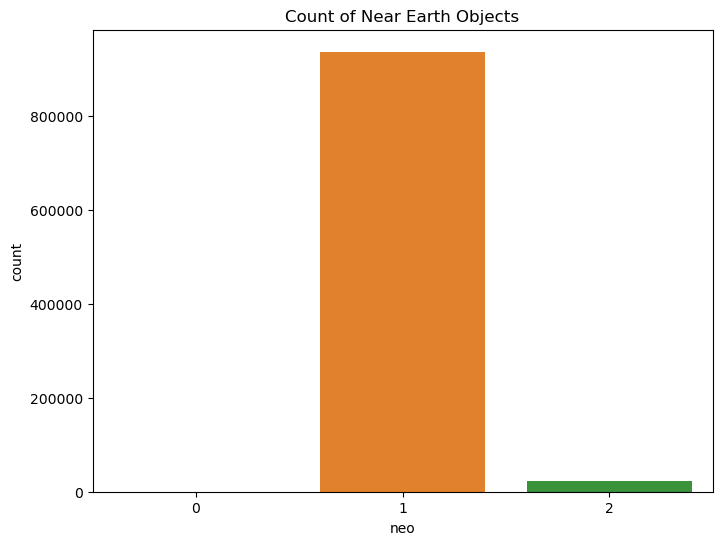

In [63]:
# Count plot for 'neo' (Near Earth Object)
plt.figure(figsize=(8, 6))
sns.countplot(x='neo', data=dataframe)
plt.title('Count of Near Earth Objects')
plt.show()


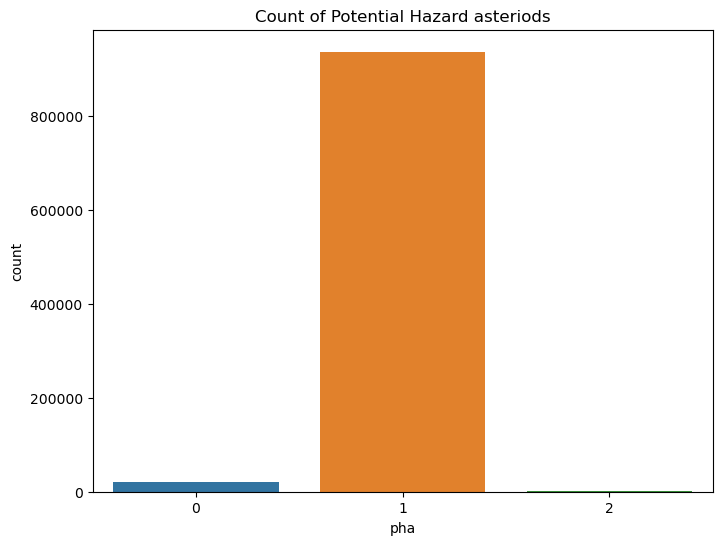

In [64]:
# Count plot for 'neo' (Near Earth Object)
plt.figure(figsize=(8, 6))
sns.countplot(x='pha', data=dataframe)
plt.title('Count of Potential Hazard asteriods')
plt.show()


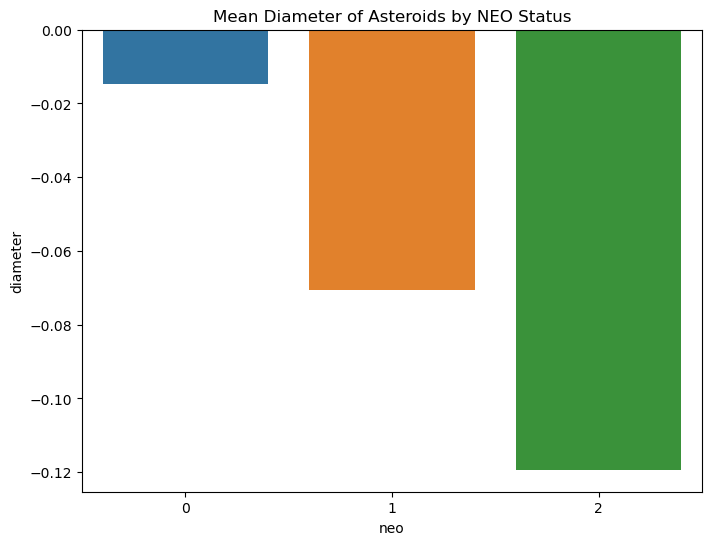

In [65]:
# Bar plot for mean diameter of asteroids by 'neo' category
plt.figure(figsize=(8, 6))
mean_diameter = dataframe.groupby('neo')['diameter'].mean().reset_index()
sns.barplot(x='neo', y='diameter', data=mean_diameter)
plt.title('Mean Diameter of Asteroids by NEO Status')
plt.show()



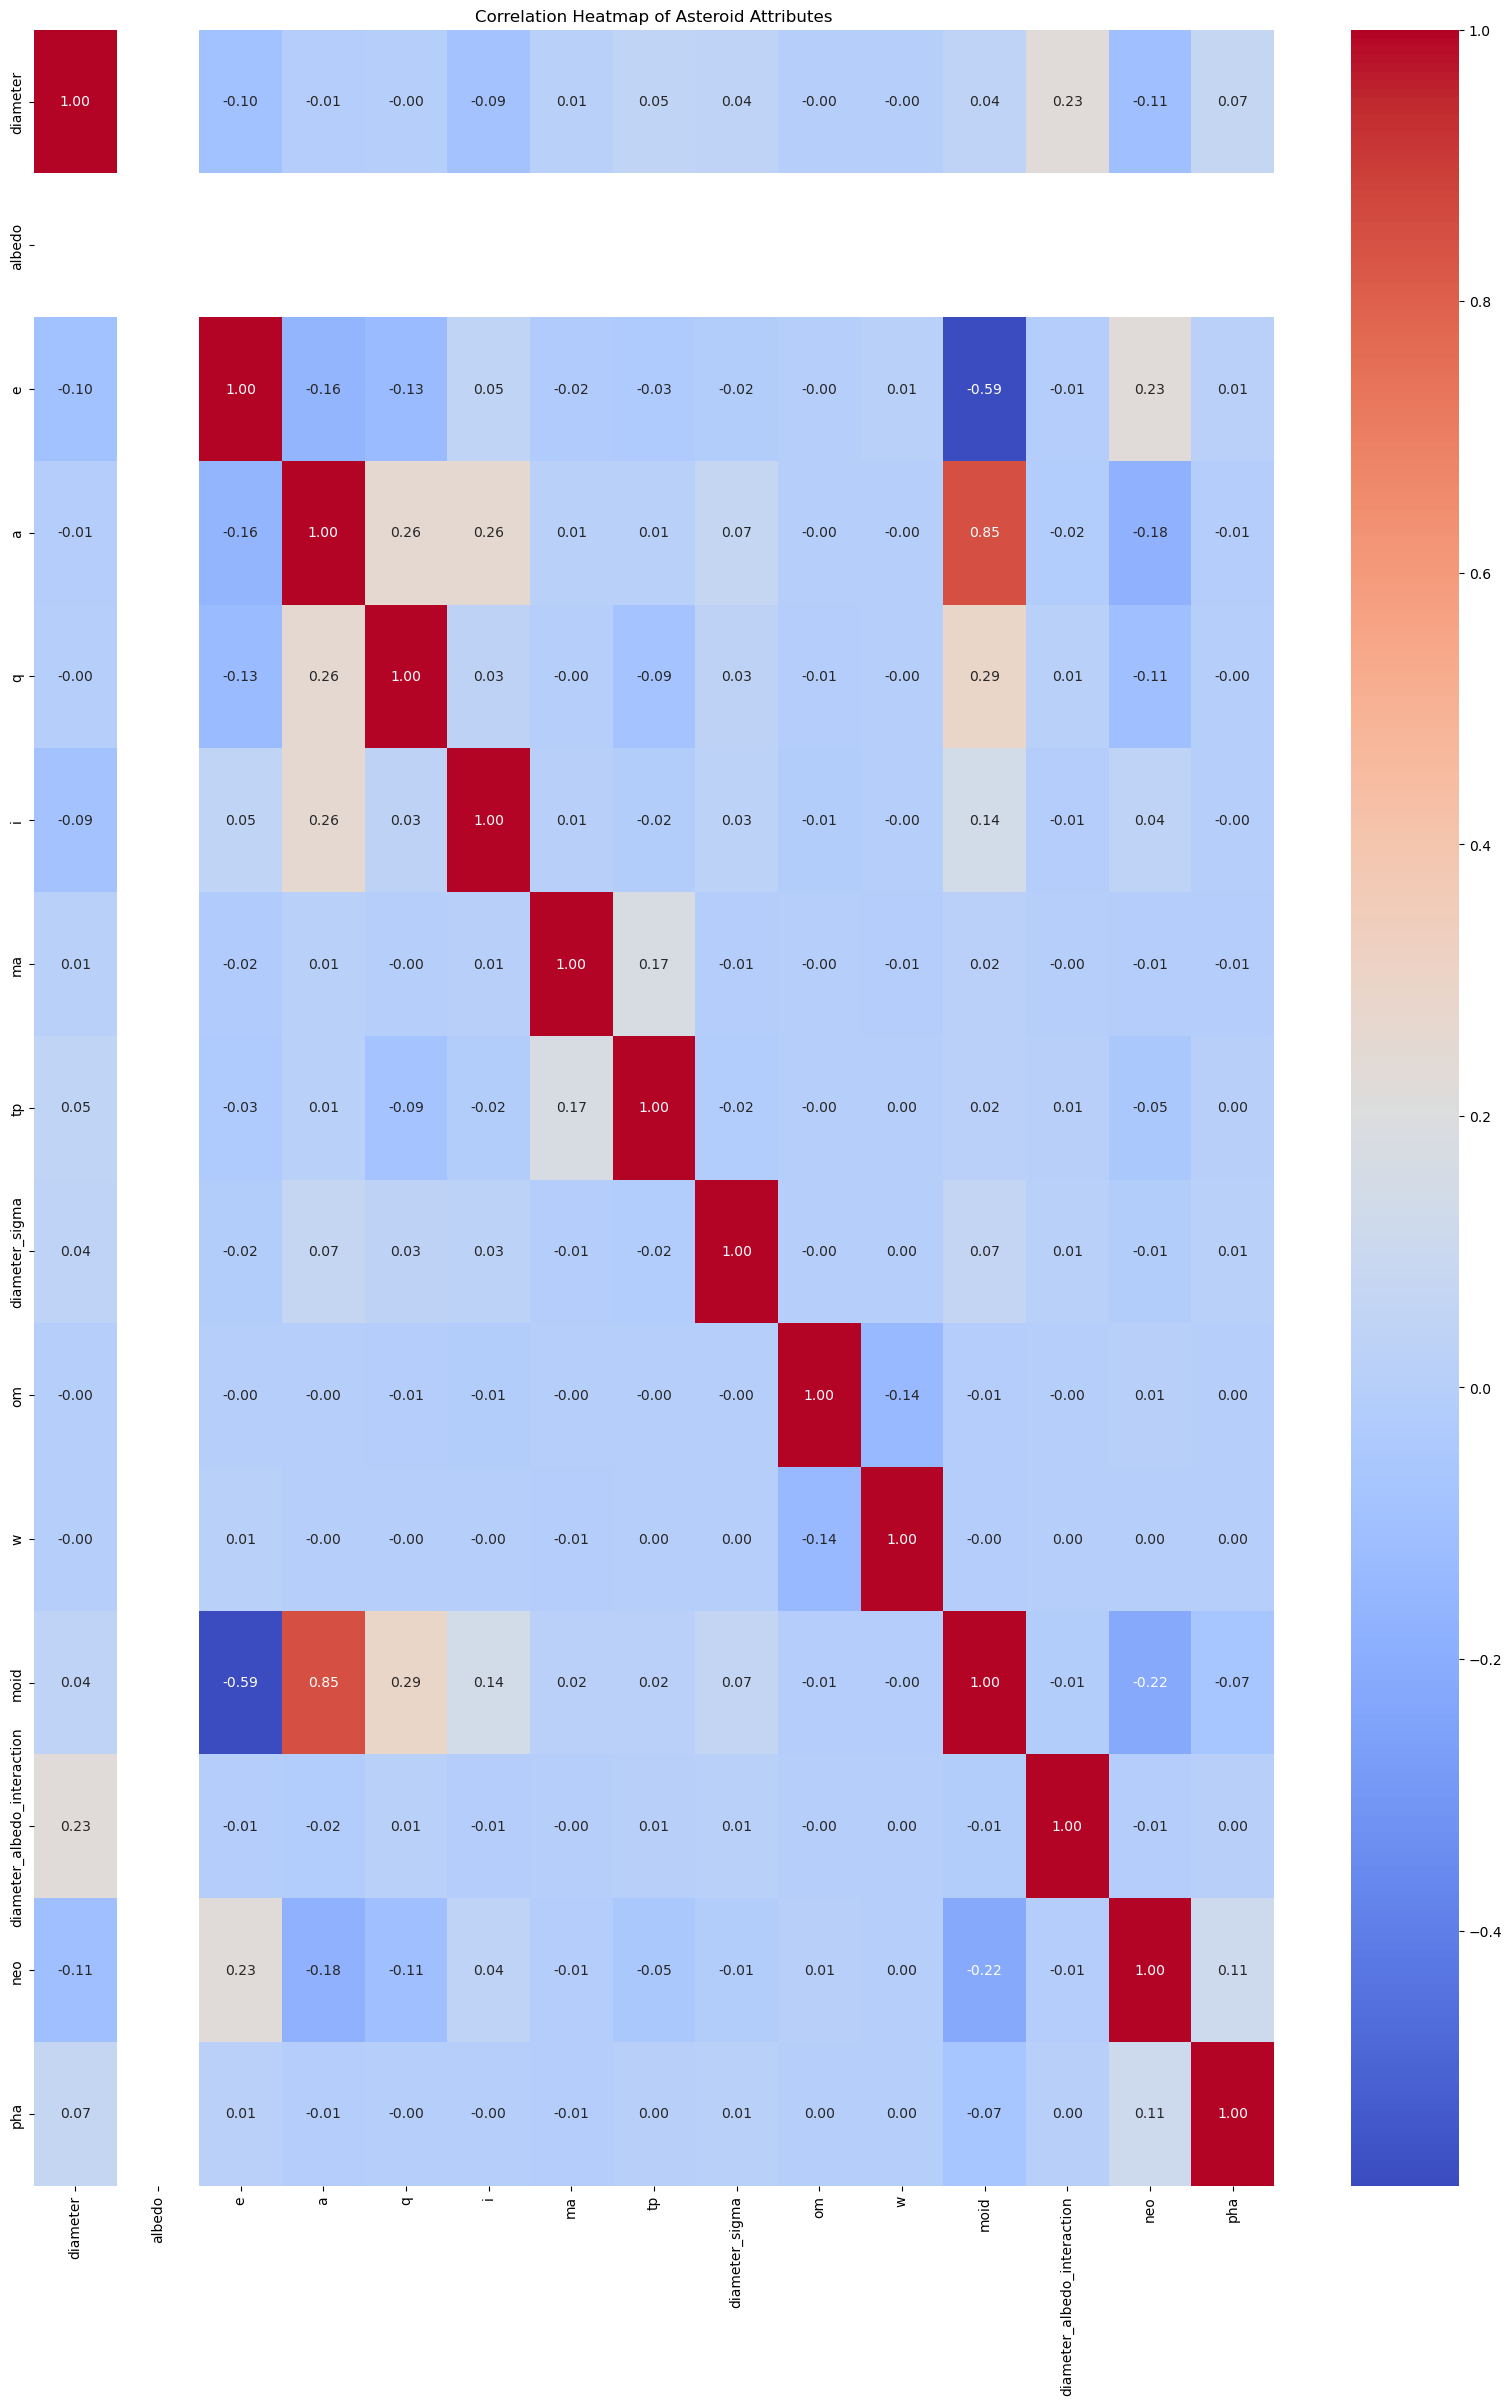

<Figure size 640x480 with 0 Axes>

In [66]:
# Correlation matrix
plt.figure(figsize=(20, 28))
corr_matrix = dataframe[['diameter', 'albedo', 'e', 'a', 'q', 'i', 'ma', 'tp', 'diameter_sigma', 'om', 'w', 'moid', 'diameter_albedo_interaction','neo', 'pha']].corr()

# Using seaborn to create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Asteroid Attributes')
plt.show()
plt.savefig('Correlation Heatmap of Asteroid Attributes')


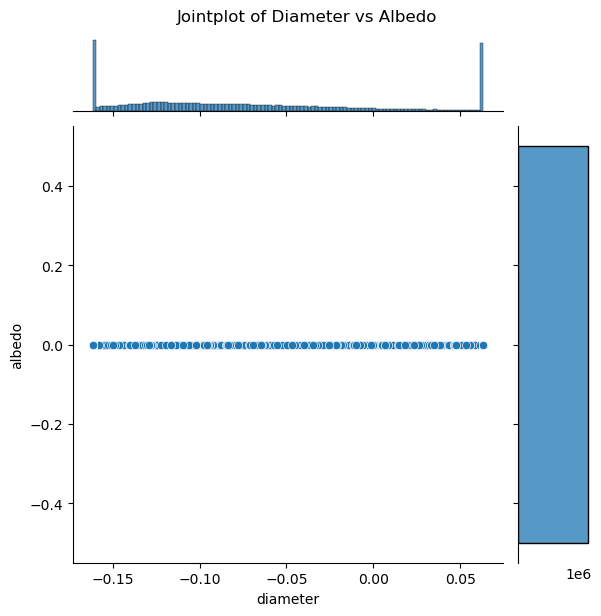

In [67]:
sns.jointplot(data=dataframe, x='diameter', y='albedo', kind='scatter')
plt.suptitle('Jointplot of Diameter vs Albedo', y=1.02)
plt.show()



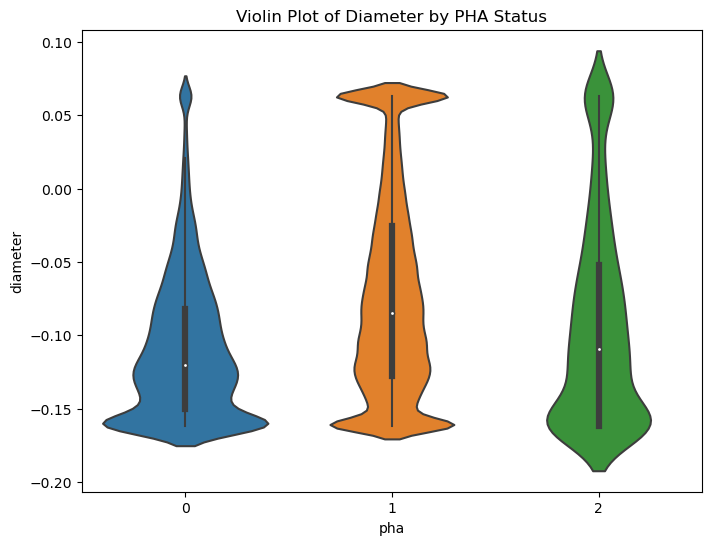

In [68]:
# Violin plot to compare the distribution of diameter across PHA status
plt.figure(figsize=(8, 6))
sns.violinplot(x='pha', y='diameter', data=dataframe)
plt.title('Violin Plot of Diameter by PHA Status')
plt.show()



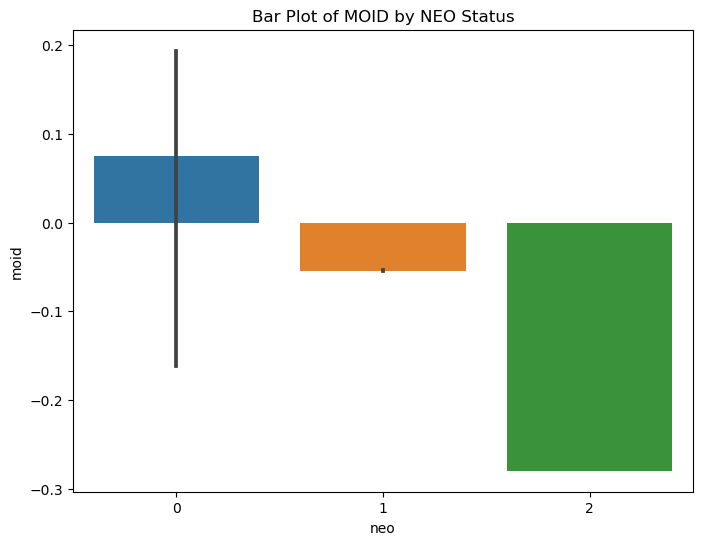

In [69]:
# Bar plot for 'moid' by 'neo' status
plt.figure(figsize=(8, 6))
sns.barplot(x='neo', y='moid', data=dataframe)
plt.title('Bar Plot of MOID by NEO Status')
plt.show()



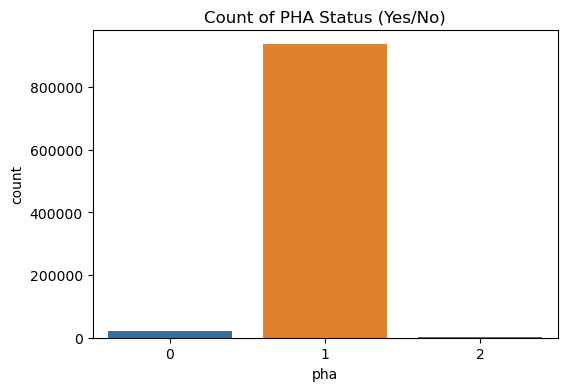

In [70]:
# Count plot to show the number of asteroids with PHA status
plt.figure(figsize=(6, 4))
sns.countplot(x='pha', data=dataframe)
plt.title('Count of PHA Status (Yes/No)')
plt.show()


In [71]:
dataframe.pha.value_counts().to_frame()

pha
1  936537
0   19921
2    2066

In [72]:
dataframe.neo.value_counts().to_frame()

neo
1  935625
2   22895
0       4

In [73]:
# Asteriods Classification (PHA or not)

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [75]:
X = dataframe[['diameter', 'albedo', 'e', 'i', 'moid_ld','H', 'eccentricity_inclination_interaction', 
        'log_diameter', 'log_moid', 'log_moid_ld', 'diameter_albedo_interaction']] 
Y = dataframe['pha']

In [76]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multiclass

print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")

Accuracy: 0.9983724994131609
Precision (weighted): 0.9981381801084032
Recall (weighted): 0.9983724994131609
F1 Score (weighted): 0.9981908849086579


In [77]:
# Predicting Asteroid Impact Risk (NEO or not)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [78]:
X = dataframe[['e', 'a', 'q', 'i', 'moid_ld', 'diameter', 'H']] 
y = dataframe['neo']

NEO Prediction Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00    280613
           2       1.00      1.00      1.00      6944

    accuracy                           1.00    287558
   macro avg       0.78      1.00      0.83    287558
weighted avg       1.00      1.00      1.00    287558



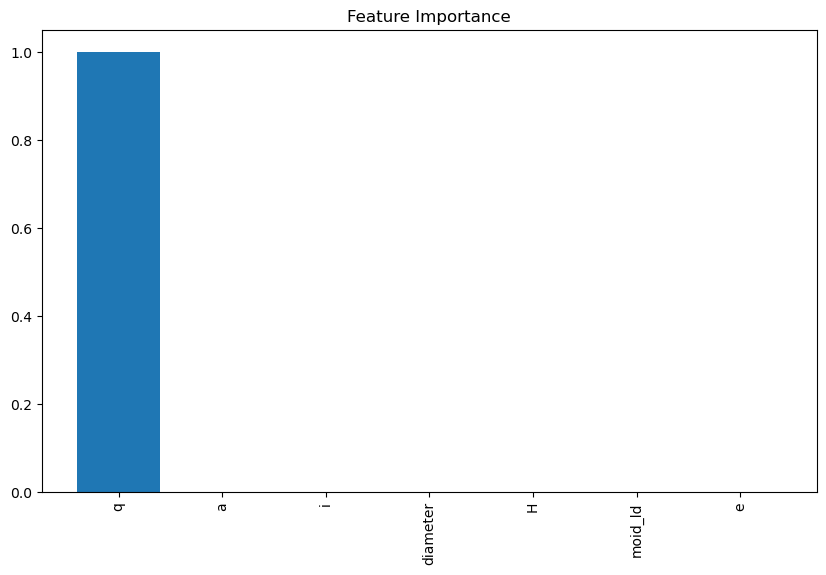

In [79]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"NEO Prediction Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance (useful to understand which features contribute most)
import matplotlib.pyplot as plt
import numpy as np

feature_importances = clf.feature_importances_
features = X.columns

# Plot feature importance
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importance")
plt.show()

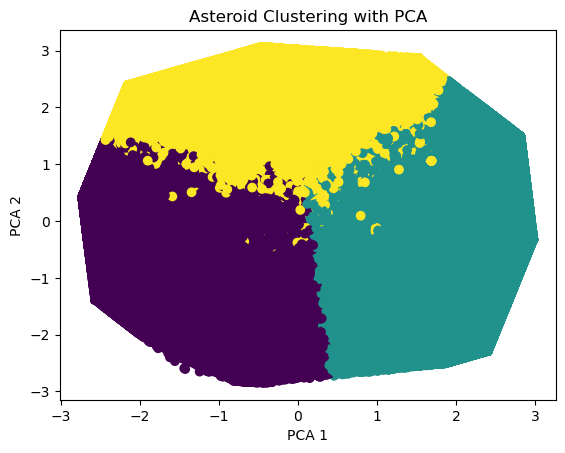

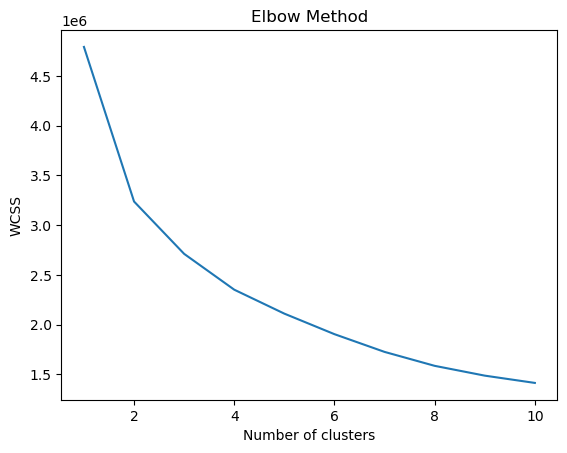

In [80]:
# Clustering Asteroids
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select features for clustering
X = dataframe[['diameter', 'e', 'a', 'i', 'moid_ld']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X_scaled)

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Asteroid Clustering with PCA')
plt.show()

# Optional: Elbow Method for choosing k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


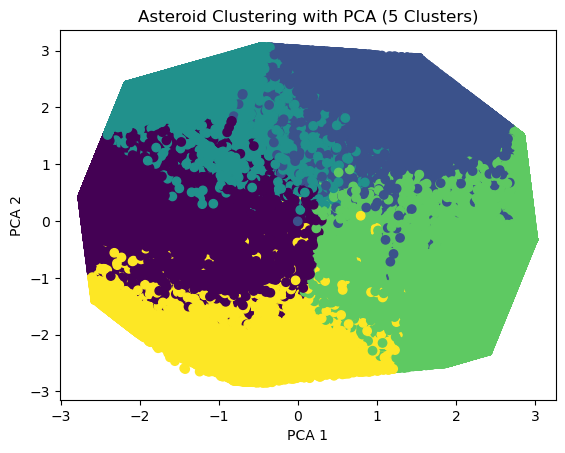

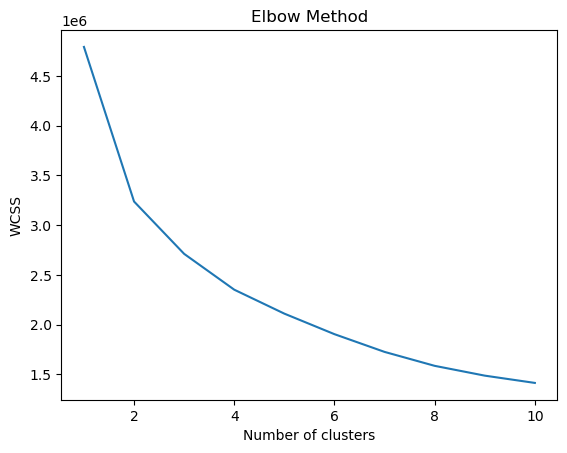

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select features for clustering
X = dataframe[['diameter', 'e', 'a', 'i', 'moid_ld']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(X_scaled)

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataframe['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Asteroid Clustering with PCA (5 Clusters)')
plt.show()

# Optional: Elbow Method for choosing k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [82]:
# Anomaly Detection in Asteroid Data
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe[['diameter', 'albedo', 'e', 'i', 'moid_ld']])

# Fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
dataframe['anomaly'] = iso_forest.fit_predict(X_scaled)

# Extract anomalies
anomalies = dataframe[dataframe['anomaly'] == -1]

print("Anomalies detected in the asteroid dataset:")
print(anomalies[['full_name', 'diameter', 'albedo', 'moid_ld']])


Anomalies detected in the asteroid dataset:
                 full_name  diameter        albedo     moid_ld
24              25 Phocaea  0.063232  1.139212e-14  359.230374
35             36 Atalante  0.063232  1.139212e-14  373.481390
131             132 Aethra  0.063232  1.139212e-14  306.010792
163                164 Eva  0.063232  1.139212e-14  342.237655
182             183 Istria  0.063232  1.139212e-14  394.151376
...                    ...       ...           ...         ...
957944           (2020 GE) -0.161549  1.139212e-14  306.010792
958234          (2020 HB8) -0.161549  1.139212e-14  306.010792
958257         (A/2020 H9) -0.161549  1.139212e-14  668.068681
958267          (2020 HK9)  0.063232  1.139212e-14  306.010792
958323           (2020 JQ)  0.047694  1.139212e-14  306.010792

[9578 rows x 4 columns]


In [83]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Normalize data
X_normalized = StandardScaler().fit_transform(X)

# Split data
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)

# Build the autoencoder
autoencoder = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_split=0.2)

# Get reconstruction errors
reconstructions = autoencoder.predict(X_normalized)
mse = np.mean(np.power(X_normalized - reconstructions, 2), axis=1)

# Threshold for anomaly detection
threshold = np.percentile(mse, 99)
dataframe['anomaly'] = [1 if e > threshold else -1 for e in mse]

# Extract anomalies
anomalies = dataframe[dataframe['anomaly'] == -1]


Epoch 1/50
38341/38341 [==============================] - 161s 4ms/step - loss: 0.5120 - val_loss: 0.5082
Epoch 2/50
38341/38341 [==============================] - 145s 4ms/step - loss: 0.5079 - val_loss: 0.5082
Epoch 3/50
38341/38341 [==============================] - 144s 4ms/step - loss: 0.5078 - val_loss: 0.5081
Epoch 4/50
38341/38341 [==============================] - 149s 4ms/step - loss: 0.5078 - val_loss: 0.5082
Epoch 5/50
38341/38341 [==============================] - 146s 4ms/step - loss: 0.5078 - val_loss: 0.5081
Epoch 6/50
38341/38341 [==============================] - 143s 4ms/step - loss: 0.5078 - val_loss: 0.5083
Epoch 7/50
38341/38341 [==============================] - 134s 3ms/step - loss: 0.5078 - val_loss: 0.5081
Epoch 8/50
38341/38341 [==============================] - 131s 3ms/step - loss: 0.5078 - val_loss: 0.5081
Epoch 9/50
38341/38341 [==============================] - 131s 3ms/step - loss: 0.5078 - val_loss: 0.5082
Epoch 10/50
38341/38341 [=====================